In [199]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import math

In [144]:
'''
x_train = pd.read_csv('')

x1 = x_train[12(koi bhi numer)]

x1.shape  ....#iske output mai last mai ek number ayega (eg.785,784,786 etc)

x1 = np.array(x1)

x1   ...#Array print hoga... toh vo array copy karo lekin upar jo number aaya tha 785 ya 784 etc us hisab se last k zero nikaalo. Jaise agar 785 hai toh last ka ek 0 nikal kyuki we want 28x28 = 784

img1 = upar jo array copy kiya vo paste

img1 = np.reshape(img1,(28,28))
'''

"\nx_train = pd.read_csv('')\n\nx1 = x_train[12(koi bhi numer)]\n\nx1.shape  ....#iske output mai last mai ek number ayega (eg.785,784,786 etc)\n\nx1 = np.array(x1)\n\nx1   ...#Array print hoga... toh vo array copy karo lekin upar jo number aaya tha 785 ya 784 etc us hisab se last k zero nikaalo. Jaise agar 785 hai toh last ka ek 0 nikal kyuki we want 28x28 = 784\n\nimg1 = upar jo array copy kiya vo paste\n\nimg1 = np.reshape(img1,(28,28))\n"

In [183]:
'''
df = pd.read_csv('mnist.csv')
img_data = np.array(df.iloc[0,1:].reshape((28,28)))
plt.imshow(img_data, c_map='gray')
'''

"\ndf = pd.read_csv('mnist.csv')\nimg_data = np.array(df.iloc[0,1:].reshape((28,28)))\nplt.imshow(img_data, c_map='gray')\n"

In [145]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000,28,28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000,)

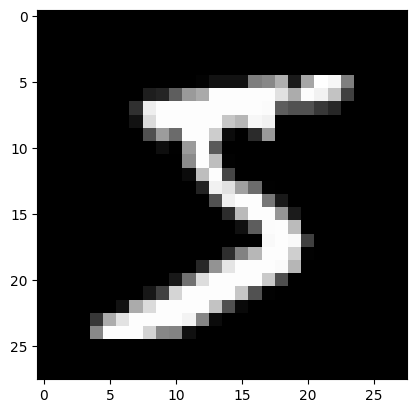

In [146]:
mnist = x_train[0]
plt.imshow(mnist, cmap='gray')

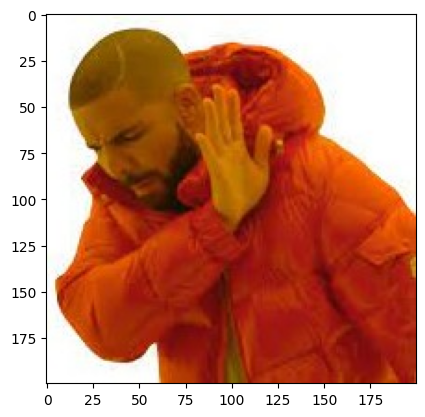

In [147]:
image = mpimg.imread('images/drake_1.jpeg')
plt.imshow(image)

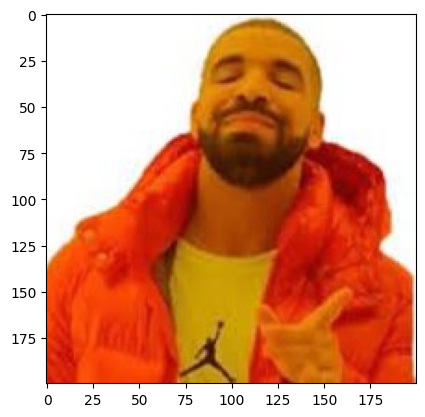

In [148]:
image1 = mpimg.imread('images/drake_2.jpeg')
plt.imshow(image1)

In [149]:
def negative_transformation(image):
    # Perform image negative transformation
    negative_image = 256 - 1 - image
    return negative_image

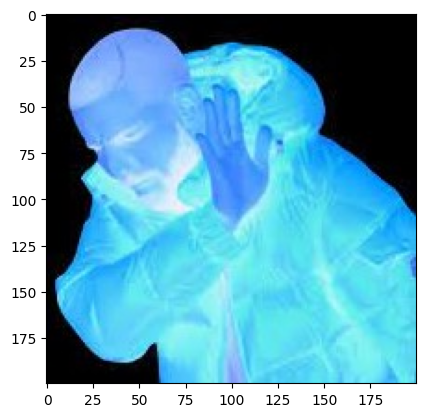

In [150]:
negative_image = negative_transformation(image)
plt.imshow(negative_image)

In [151]:
def grayscale(image):
    if len(image.shape) == 3:
        # Convert to grayscale using the formula:
        # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
        grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    else:
        # The image is already in grayscale
        grayscale_image = image
    return grayscale_image

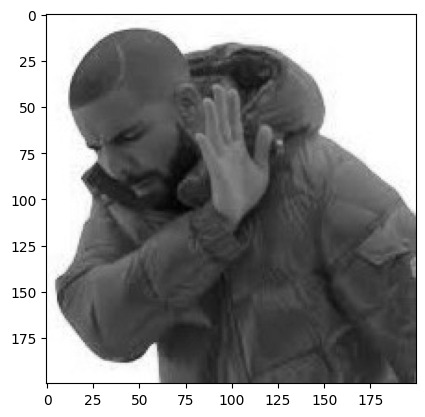

In [152]:
gray_image=grayscale(image)
plt.imshow(gray_image, cmap='gray')

In [153]:
def crop_img(img, x, y):
    height, width, channels = img.shape
    cropped_img = img [x:x+width, y:y+height]
    return cropped_img

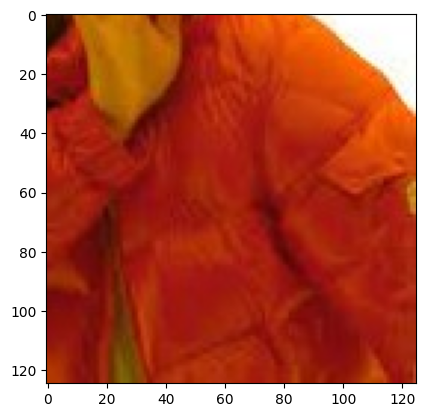

In [154]:
cropped = crop_img(image, 75, 75)
plt.imshow(cropped)

In [155]:
def add(image1,image2):
    assert image1.shape == image2.shape
    return image1+image2
def sub(image1,image2):
    assert image1.shape == image2.shape
    return image1-image2
def mult(image1,image2):
    assert image1.shape == image2.shape
    return image1*image2
def div(image1,image2):
    assert image1.shape == image2.shape
    return image1/image2
def blend(image1,image2,alpha):
    assert image1.shape == image2.shape
    return(alpha*image1 + (1-alpha)*image2)

In [156]:
def Land(image1,image2):
    assert image1.shape == image2.shape
    return np.bitwise_and(image1,image2)
def Lor(image1,image2):
    assert image1.shape == image2.shape
    return np.bitwise_or(image1,image2)
def Lnot(image1,image2):
    assert image1.shape == image2.shape
    return np.bitwise_not(image1)
def Lxor(image1,image2):
    assert image1.shape == image2.shape
    return np.bitwise_xor(image1,image2)

In [157]:
def bls(image,n):
    return np.left_shift(image,n)
def brs(image,n):
    return np.right_shift(image,n)

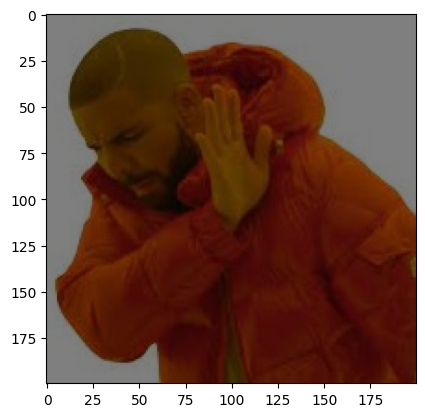

In [158]:
result = brs(image, 1)
plt.imshow(result)

C:\Users\Yash Thakar\AppData\Local\Temp\ipykernel_15680\2622792171.py:4: RuntimeWarning: divide by zero encountered in log
  return c* np.log(1+x)
C:\Users\Yash Thakar\AppData\Local\Temp\ipykernel_15680\2622792171.py:9: RuntimeWarning: invalid value encountered in cast
  log_img[i][j] = logfx(image[i][j],c)


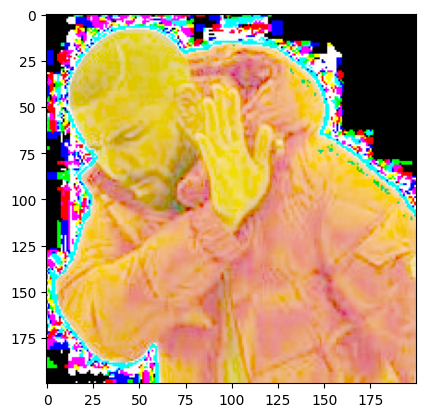

In [159]:
#log
c = 255/(np.log(1 + np.max(image)))
def logfx(x,c):
  return c* np.log(1+x)

log_img = image.copy()
for i in range(len(image)):
  for j in range(len(image[0])):
    log_img[i][j] = logfx(image[i][j],c)
    
plt.imshow(log_img)

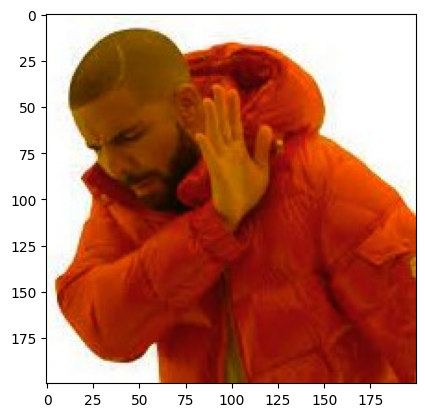

In [160]:
# power
def powfx(x,gamma):
  c = 255
  return c*((x/255)**gamma)
pow_img = image.copy()
for i in range(len(image)):
  for j in range(len(image[0])):
    pow_img[i][j] = powfx(image[i][j],1.2)
plt.imshow(pow_img)

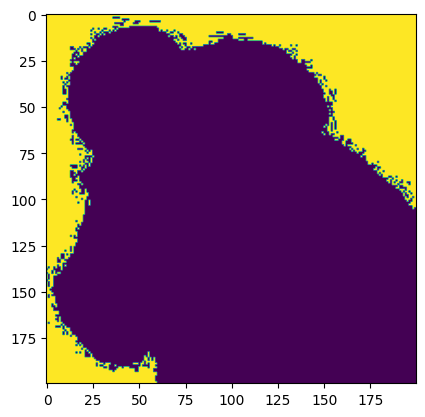

In [161]:
def grayscale(image):
    if len(image.shape) == 3:
        # Convert to grayscale using the formula:
        # Grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B
        grayscale_image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    else:
        # The image is already in grayscale
        grayscale_image = image
    return grayscale_image

def thresholding(image, t):
    grayscale_img = grayscale(image)
    # Apply thresholding
    threshold_img = np.zeros_like(grayscale_img)
    threshold_img[grayscale_img > t] = 255
    return threshold_img

t_image = thresholding(image, 250)
plt.imshow(t_image)

In [162]:
def gray_level_slicing(image, lower_bound, upper_bound, background_intensity=False):
    # Perform gray-level slicing
    if background_intensity:
        sliced_image = np.where((image >= lower_bound) & (image <= upper_bound), 255, image)
    else:
        sliced_image = np.where((image >= lower_bound) & (image <= upper_bound), image, 255)
    return sliced_image

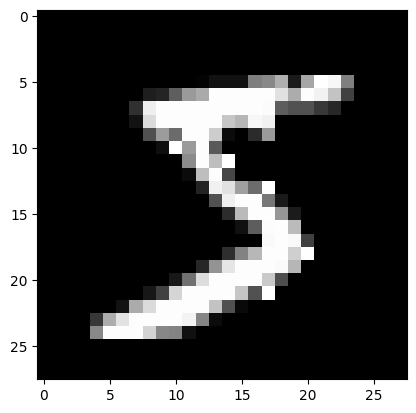

In [163]:
lower_bound = 1
upper_bound = 2
    
# With background intensity slicing
sliced_image_with_background = gray_level_slicing(mnist, lower_bound, upper_bound, True)
plt.imshow(sliced_image_with_background, cmap = 'gray')

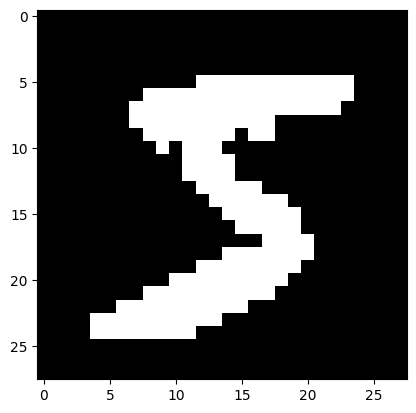

In [165]:
lower_bound = 0
upper_bound = 1

# Without background intensity slicing
sliced_image_without_background = gray_level_slicing(mnist, lower_bound, upper_bound, False)
plt.imshow(sliced_image_without_background, cmap = 'gray')

In [166]:
def contrast_stretching(image):
    # Apply contrast stretching
    min_intensity = np.min(image)
    max_intensity = np.max(image)
    stretched_image = ((image - min_intensity) / (max_intensity - min_intensity)) * 255

    return stretched_image.astype(np.uint8)

In [167]:
def contrast_hist(image, stretched_image):
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    plt.title('Histogram - Original Image')
    plt.hist(image.flatten(), 256, [0, 256], color='black')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.title('Histogram - Stretched Image')
    plt.hist(stretched_image.flatten(), 256, [0, 256], color='black')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

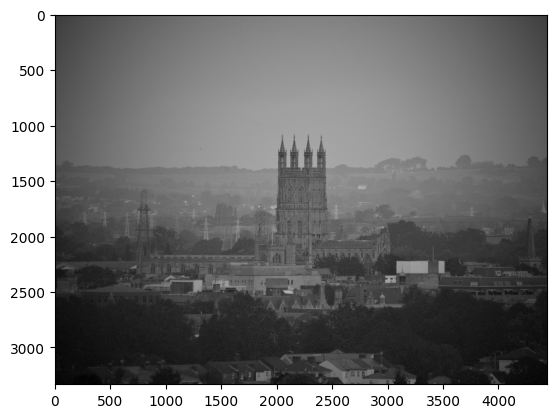

In [168]:
lowc_image = mpimg.imread('images/lowcontrast_test.jpg')
plt.imshow(lowc_image)

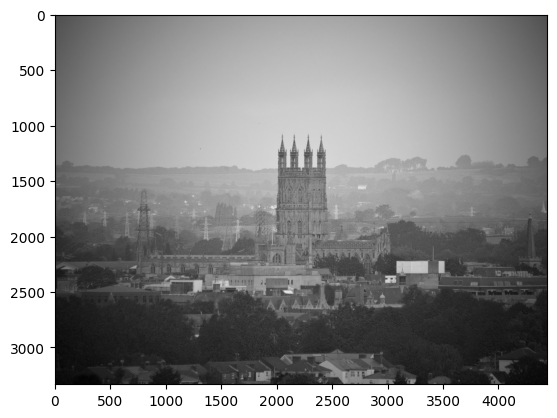

In [169]:
stretched_image = contrast_stretching(lowc_image)
plt.imshow(stretched_image)

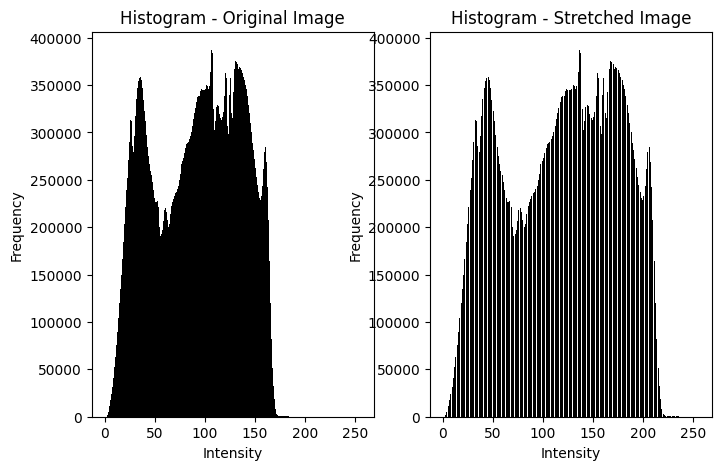

In [170]:
contrast_hist(lowc_image, stretched_image)

In [171]:
def contrast_strech(image,s1,s2,r1,r2):
    og_shape=image.shape
    temp_img=image.flatten()
    new_img=[]
    alpha=s1/r1
    beta=(s2-s1)/(r2-r1)
    gamma=(255-s2)/(255-r2)
    for pixel in temp_img:
        if(pixel<r1):
            new_img.append(alpha*pixel)
        elif(pixel>=r1 and pixel<r2):
            new_img.append(beta*(pixel-r1)+s1)
        else:
            new_img.append(gamma*(pixel-r2)+s2)
    return np.array(new_img).reshape(og_shape)

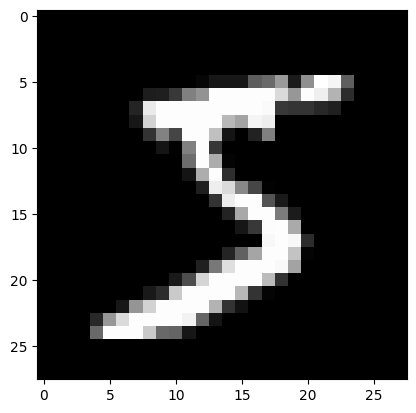

In [172]:
cs=contrast_strech(mnist,20,60,10,100)
plt.imshow(cs,cmap='gray')

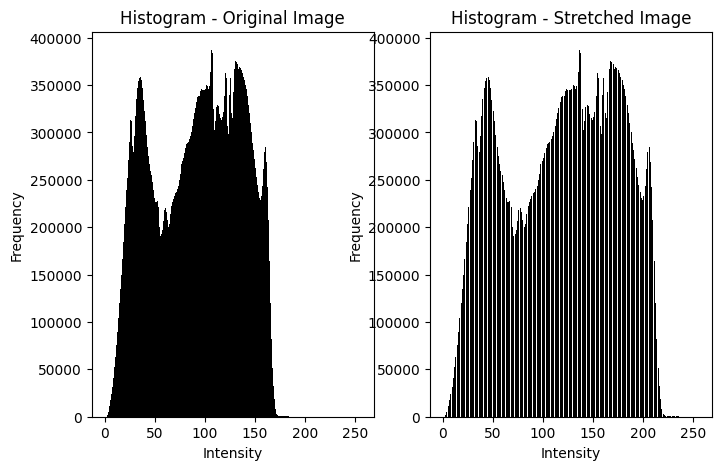

In [173]:
contrast_hist(lowc_image, stretched_image)

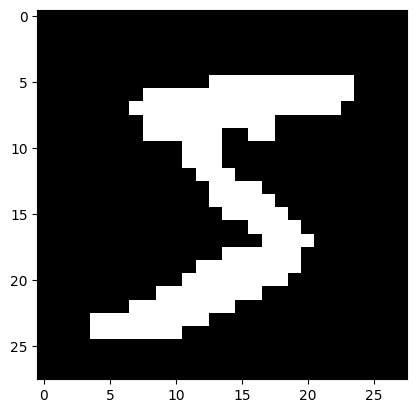

In [182]:
# Merge and Split

def merge_regions(regions):
    while True:
        merged = False
        new_regions = []
        while regions:
            current = regions.pop()
            was_merged = False
            for idx, region in enumerate(new_regions):
                if abs(np.mean(region) - np.mean(current)) < 5:
                    new_regions[idx] = np.vstack([region, current])
                    was_merged = True
                    merged = True
                    break
            if not was_merged:
                new_regions.append(current)
        regions = new_regions
        if not merged:
            break
    return regions


def split_and_merge(image, num_regions):
    rows, cols = image.shape
    step = rows // num_regions
    regions = [np.arange(i, min(i + step, rows)) for i in range(0, rows, step)]
    regions = merge_regions(regions)

    output_image = np.zeros_like(image)
    for region in regions:
        for row in region:
            output_image[row, :] = ((np.mean(image[region, :]) - image[row, :]) < 10) * 255
    return output_image


gray_image = grayscale(image1)
split_merged_image = split_and_merge(mnist, 4)

plt.imshow(split_merged_image, cmap="gray")

In [184]:
def erosion(image,mask):
    eroded_image = np.zeros(image.shape,dtype=np.uint8)
    padded_image = np.pad(image,[(1,1),(1,1)], mode='constant')
    kernel_mask = (mask == 1)
    for i in range(1,image.shape[0]+1):
        for j in range(1,image.shape[1]+1):
            sub_array = padded_image[i-1:i+2,j-1:j+2]
            if(np.all(sub_array[kernel_mask])):
                eroded_image[i-1][j-1] = 1
    return eroded_image

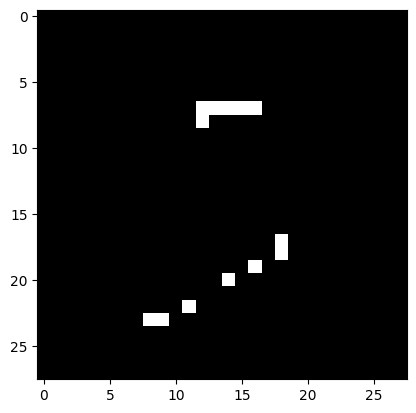

In [189]:
binary_image = np.where(mnist > 127,1,0)
ero = erosion(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(ero, cmap='gray')

In [180]:
def dilation(image,mask):
    dilated_img = np.zeros(image.shape)
    padded_img = np.pad(image,[(1,1),(1,1)])
    kernel_mask = (mask ==1)
    for i in range(1,image.shape[0]+1):
        for j in range(1,image.shape[1]+1):
            sub_array = padded_img[i-1:i+2,j-1:j+2]
            if(np.any(sub_array[kernel_mask])):
                dilated_img[i-1][j-1] = 1
    return dilated_img

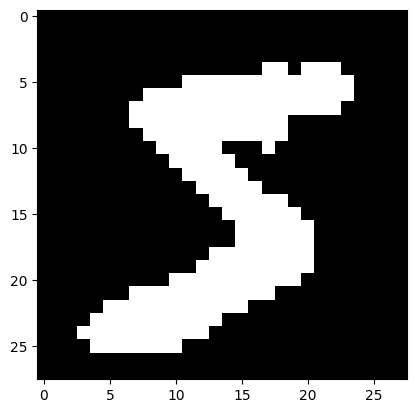

In [181]:
binary_image = np.where(mnist > 127,1,0)
dial = dilation(binary_image,np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(dial,cmap = 'gray')

In [191]:
def opening(image, struct_elem):
    eroded = erosion(image,struct_elem)
    opened = dilation(eroded,struct_elem)
    return opened

def closing(image, struct_elem):
    dilated = dilation(image,struct_elem)
    closed = erosion(dilated,struct_elem)
    return closed

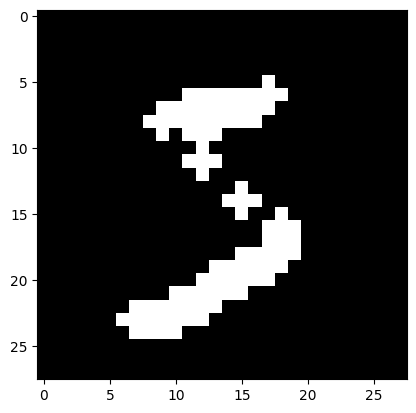

In [195]:
opened = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(opened, cmap='gray')

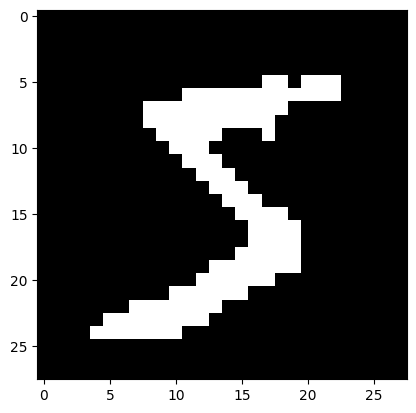

In [196]:
closed = closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
plt.imshow(closed, cmap='gray')

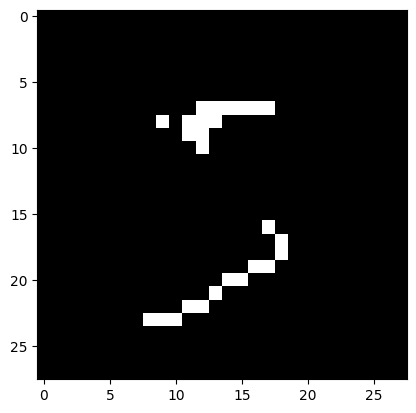

In [197]:
def hmt(image, b1, b2):
  image_c = np.where(image==0, 1, 0)
  hmt = np.bitwise_and(erosion(image, b1), erosion(image_c, b2))
  return hmt

hmt = hmt(binary_image, np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))
plt.imshow(hmt, cmap='gray')

In [200]:
def center_img(image):
    new_image=np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_image[i,j]=math.pow(-1,(i+j))*image[i,j]
    return new_image

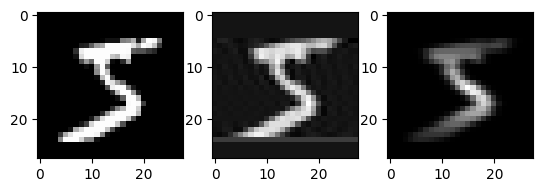

In [203]:
#ideal low pass
def ideal_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=(math.sqrt(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))<=t)
    s3=s2*huv
    s4=np.fft.ifft(s3).real
    s5=center_img(s4)
    return s5

#gaussian low pass
def gauss_lp_filter(image,t):
    s1=center_img(image)
    s2=np.fft.fft(s1)
    huv=np.zeros(s2.shape)
    for i in range(s2.shape[0]):
        for j in range(s2.shape[1]):
            huv[i,j]=np.exp(-2*(math.pow((i-(s2.shape[0]/2)),2)+math.pow((j-(s2.shape[1]/2)),2))/(math.pow(t,2)))
    s3=s2*huv
    s4=np.fft.ifft(s3)
    s5=np.array([elem.real for elem in np.fft.ifft(s3)]).reshape(s4.shape)
    s6=center_img(s5)
    return s6

g_lp_filter_img = gauss_lp_filter(mnist, 10)
ideal_lp_filter_img=ideal_lp_filter(mnist, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_lp_filter_img, cmap='gray')
axis[2].imshow(g_lp_filter_img, cmap='gray')
axis[0].imshow(mnist, cmap='gray')

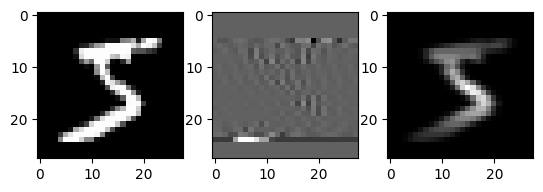

In [205]:
#ideal high pass
def ideal_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = (math.sqrt(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) > t)
  s3 = s2*huv
  s4= np.fft.ifft(s3).real
  s5 = center_img(s4)
  return s5

def gauss_hp_filter(image, t):
  s1 = center_img(image)
  s2 = np.fft.fft(s1)
  huv = np.zeros(s2.shape)
  for i in range(s2.shape[0]):
    for j in range(s2.shape[1]):
      huv[i,j] = np.exp(-2*(math.pow(i-s2.shape[0]/2, 2) + math.pow(j-s2.shape[1]/2, 2)) / math.pow(t,2))
  s3 = s2*huv
  s4 = np.fft.ifft(s3).real
  s5= center_img(s4)
  return s5

g_hp_filter_img = gauss_hp_filter(mnist, 10)
ideal_hp_filter_img=ideal_hp_filter(mnist, 10)

figure, axis = plt.subplots(1,3)
axis[1].imshow(ideal_hp_filter_img, cmap='gray')
axis[2].imshow(g_hp_filter_img, cmap='gray')
axis[0].imshow(mnist, cmap='gray')